# Short guide to jupyter notebook plotting
Start by importing some _essential_ modules

In [15]:
%matplotlib inline
import os, sys, json, pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict as OD
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

Now, you can also install _pandas_ and provided you have _pyroot_ installed, you can also install _rootnumpy_ (https://pypi.python.org/pypi/root_numpy).

This is going to make working with root files muuch easier.

In [2]:
import pandas as pd
import root_numpy as rnp

_rootnumpy_ lets you convert a ROOT file (like _anatree_) into a _numpy_ array.

You can then import _that_ into a pandas dataframe to have an extremely useful data format for your sample.

I use this small custom function to open a ROOT file.

In [6]:
# Useful converting function
def Pandafy(fileName, tree):
    df = pd.DataFrame(rnp.root2array(fileName,tree))
    return df

# Load up ROOT tree
df = Pandafy('RootFiles/newhsn.root','ScanRecoSelectionParameters0/Data')

You can just write a variable (or a dataframe for example) in a cell to take a look at it.

In [7]:
# Print dataframe
df

,run,subrun,event,nTracks,nShowers,pairDistance,nPairs,nTrackVertices,nShowerVertices,potPairDistance,...,par2ChargeInRadius,caloRatio,pandora_nPrimaryVertices,pandora_primaryVertexPDG,pandora_nDaughters,pandora_nTracks,pandora_nShowers,pandora_nNearTracks,pandora_nNearShowers,pandora_nCleanVertices
0,1,1374,27461,3,1,"[110.966, 6.45761, 24.7196, 1.36439, 5.32339, ...",15,6,0,"[6.45761, 1.36439, 5.32339, 6.53077, 6.00235, ...",...,[],[],0,[],[],[],[],[],[],0
1,1,1374,27462,2,0,"[86.9543, 0.285423, 13.5082, 86.7931, 92.0777,...",6,4,0,[0.285423],...,"[[1380.65, 1380.65, 2795.43, 3382.14, 4367.84,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995328, 0.99...",0,[],[],[],[],[],[],0
2,1,1374,27463,0,0,[],0,0,0,[],...,[],[],0,[],[],[],[],[],[],0
3,1,1374,27464,2,0,"[50.2456, 2.84202, 36.6712, 53.0406, 52.135, 3...",6,4,0,[2.84202],...,"[[512.763, 2261.69, 2666.35, 3775.53, 4419.27,...","[[0.412189, 0.617301, 0.664949, 0.745433, 0.78...",0,[],[],[],[],[],[],0
4,1,1374,27465,2,0,"[86.0401, 0.76064, 7.59494, 86.6198, 92.0245, ...",6,4,0,"[0.76064, 7.59494, 6.84088]",...,"[[881.515, 2022.26, 2971.17, 4020.59, 4876.84,...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0,[],[],[],[],[],[],0
5,1,1374,27466,2,1,"[35.4879, 0.801441, 17.2692, 35.3762, 26.2399,...",6,4,1,[0.801441],...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",0,[],[],[],[],[],[],0
6,1,1374,27467,1,0,[20.9775],1,2,0,[],...,[],[],0,[],[],[],[],[],[],0
7,1,1374,27468,1,1,[134.82],1,2,1,[],...,[],[],0,[],[],[],[],[],[],0
8,1,1374,27469,2,0,"[164.349, 0.948036, 44.5271, 163.685, 137.954,...",6,4,0,[0.948036],...,"[[833.82, 2482.19, 4064.33, 4571.24, 5782.35, ...","[[1.0, 1.0, 1.0, 0.9967, 0.997345, 0.997894, 0...",0,[],[],[],[],[],[],0
9,1,1374,27470,2,0,"[36.573, 0.82546, 26.1912, 36.9586, 40.1512, 2...",6,4,0,[0.82546],...,"[[874.542, 1324.69, 1788.82, 2297.98, 2923.98,...","[[0.671872, 0.719231, 0.739351, 0.782435, 0.80...",0,[],[],[],[],[],[],0


Now the root file has been loaded in this nice dataframe.

Let's take a look at a column.

In [8]:
# Print out specific column/branch
df['nTrackVertices']

0     6
1     4
2     0
3     4
4     4
5     4
6     2
7     2
8     4
9     4
10    0
11    4
12    4
13    4
14    8
15    4
16    4
17    6
18    4
19    4
Name: nTrackVertices, dtype: int32

You can become an expert in _pandas_ by just spending 10 minutes in this introduction: https://pandas.pydata.org/pandas-docs/stable/10min.html

Most important things are loops and cuts.

Let's loop through the dataframe and find out how many events with nTracksVertices > 4

In [11]:
eventsHighVertices = 0

# Loop through rows (event), select nTrackVertices and perform check
for i,row in df.iterrows():
    if row['nTrackVertices'] > 4:
        eventsHighVertices += 1


print "Number of events with nTrackVertices>4: %i" %(eventsHighVertices)

Number of events with nTrackVertices>4: 3


We can actually apply a selection on the dataframe in the same way.

Let's select nTrackVertices>4 and nShowerVertices==0.

In [13]:
# Define cuts
selection1 = df['nTrackVertices'] > 4
selection2 = df['nShowerVertices'] == 0

# Apply cuts
selectedDf = df[selection1 & selection2]

# Print dataframe
selectedDf

,run,subrun,event,nTracks,nShowers,pairDistance,nPairs,nTrackVertices,nShowerVertices,potPairDistance,...,par2ChargeInRadius,caloRatio,pandora_nPrimaryVertices,pandora_primaryVertexPDG,pandora_nDaughters,pandora_nTracks,pandora_nShowers,pandora_nNearTracks,pandora_nNearShowers,pandora_nCleanVertices
0,1,1374,27461,3,1,"[110.966, 6.45761, 24.7196, 1.36439, 5.32339, ...",15,6,0,"[6.45761, 1.36439, 5.32339, 6.53077, 6.00235, ...",...,[],[],0,[],[],[],[],[],[],0
14,1,1374,27475,4,0,"[290.521, 3.95089, 56.7684, 6.42831, 9.98516, ...",28,8,0,"[3.95089, 6.42831, 9.98516, 5.33199, 7.51286, ...",...,[],[],0,[],[],[],[],[],[],0


Let's make a simple plot now

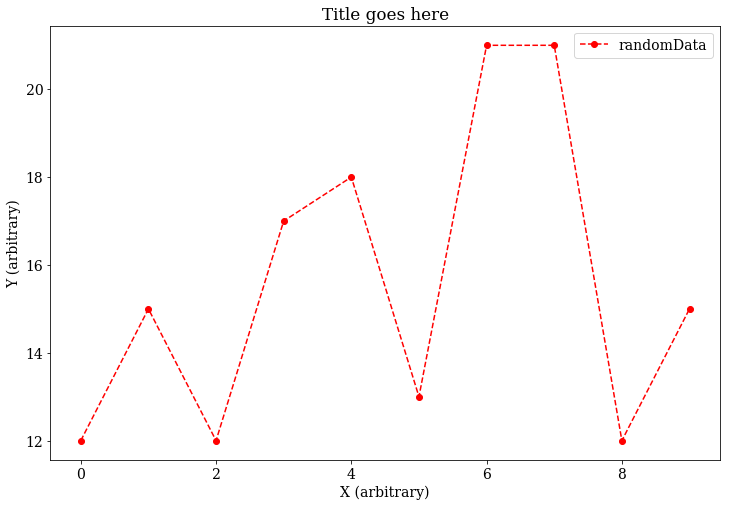

In [23]:
# Select a column
dataX = [0,1,2,3,4,5,6,7,8,9]
dataY = [12,15,12,17,18,13,21,21,12,15]

fig = plt.figure(figsize=figsize)
plt.plot(dataX,dataY,color='red',ls='--',marker='o',label='randomData')
plt.xlabel('X (arbitrary)')
plt.ylabel('Y (arbitrary)')
plt.title('Title goes here')
plt.legend(loc='best')
plt.show()

If we are working with root files we probably want to make histograms, I've written a custom function for that.

In [18]:
def HepHist(data,nbins=20,xlims=[0,0],xtrim=False,xLog=False,yLog=False,color='C0',label='',norm=False,fill=True,alpha=0.1):
    if xlims[0] == 0 and xlims[1] == 0: xlims = [min(data),max(data)]
    ls = '-'
    lw = 2
    plt.rcParams['hatch.color'] = color
    if xLog:
        if xlims[0]==0 or xlims[1]==0: raise Exception("xlims must be >0!")
        hist, bin_edges = np.histogram(data,bins=np.logspace(np.log10(xlims[0]),np.log10(xlims[1]),nbins))
    else: hist, bin_edges = np.histogram(data,bins=nbins,range=xlims)
    bin_center = [(bin_edges[i] + bin_edges[i+1])/2. for i in range(len(bin_edges)-1)]
    xerr = (bin_center[1]-bin_center[0])/2.
    yerr = np.sqrt(hist)
    if norm:
        normFactor = float(np.sum(hist))
        hist = hist/normFactor
        yerr = yerr/normFactor
    plt.step(bin_edges[:-1],hist,where='post',color=color,linestyle=ls,lw=lw,label=label)
    plt.errorbar(bin_center,hist,xerr=xerr,fmt='.',color=color,lw=lw)
    plt.errorbar(bin_center,hist,yerr=yerr,fmt='.',color=color,lw=lw,capsize=3,elinewidth=1)
    if fill:      
        xfill = []
        yfill = []
        for x in bin_edges:
            xfill.append(x)
            xfill.append(x)
        for y in hist:
            yfill.append(y)
            yfill.append(y)    
        xfill = xfill[1:-1]
        plt.fill_between(xfill,0,yfill,facecolor=color,alpha=alpha,lw=0)
    plt.plot([bin_edges[0],bin_edges[0]],[0,hist[0]],color=color,ls=ls,lw=lw)
    plt.plot([bin_edges[-1],bin_edges[-1]],[0,hist[-1]],color=color,ls=ls,lw=lw)
    plt.gca().set_ylim(bottom=0)
    if xtrim: plt.xlim(xlims)
    if hist.max() > plt.gca().get_ylim()[1]*0.9: plt.gca().set_ylim(top=hist.max()*1.1)
    if xLog: plt.xscale('log')
    if yLog: plt.yscale('log'); plt.gca().set_ylim(bottom=0.1)
    plt.grid(ls='--')

In order to use it, just prepare an array with all the data you want to plot.

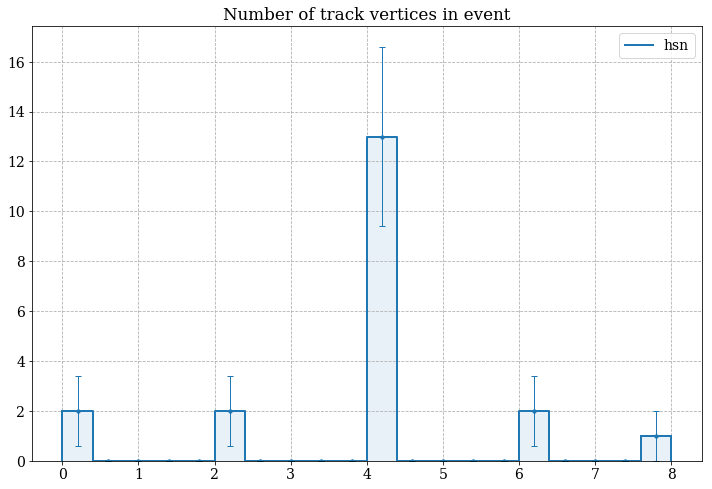

In [25]:
data = df['nTrackVertices']

plt.figure(figsize=figsize)
HepHist(data,label='HSN')
plt.title('Number of track vertices in event')
plt.legend(loc='best')
plt.show()

If you look at how the function is defined, you can specify ranges or bins

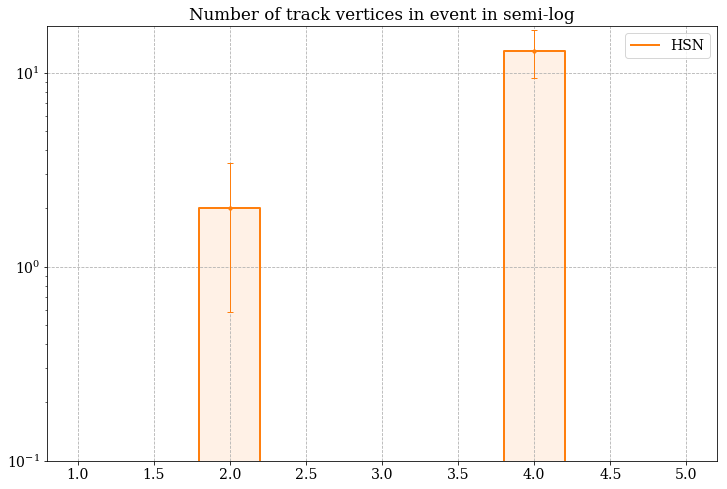

In [29]:
plt.figure(figsize=figsize)
HepHist(data,10,[1,5],yLog=True,color='C1',label='HSN')
plt.title('Number of track vertices in event in semi-log')
plt.legend(loc='best')
plt.show()